## Analyze spatial entropy for model realizations

In [48]:
# basic imports
import numpy as np                                        
import matplotlib.pyplot as plt     
import pickle
import pandas as pd

### Load Data

We first load the dataset from the generated `pickle` file:

In [84]:
# realizations = pickle.load(open("facies_realizations_ncut_64x64.pkl", 'rb'))
realizations = pickle.load(open("facies_realizations_ncut_f2_32x32.pkl", 'rb'))
df = pickle.load(open("data_frame.pkl", 'rb'))

df.head()

,index,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,347,549,900.0,109.0,1.0,0.172168,52.273043,4354.446742
1,335,529,950.0,99.0,1.0,0.174671,88.241632,5689.415440
2,278,443,720.0,899.0,1.0,0.148054,18.235939,4657.906573
3,114,187,200.0,389.0,1.0,0.121670,3.254674,4836.252830
4,256,412,500.0,579.0,0.0,0.098164,6.596546,5681.646332


Also, load input data to compare to results:

In [85]:
import sys
sys.path.append("../../../hspace/")
import hspace.measures
import importlib
importlib.reload(hspace.measures)

pymc is not installed - Bayesian entropy estimation will not work.


<module 'hspace.measures' from '../../../hspace/hspace/measures.py'>

In [86]:
h_sec = hspace.measures.EntropySection(realizations)

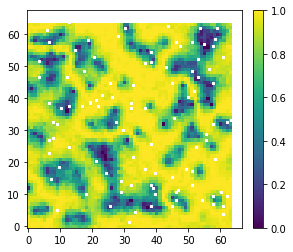

In [87]:
data_points = df.values[:,2:4]/1000*64
h_sec.plot_entropy(data_points=data_points)
# df.plot.scatter(x="X", y="Y", c="Facies", colormap='RdBu')

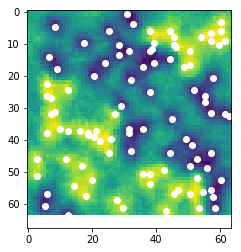

In [92]:
data_points = df.values[:,2:4]/1000*64
plt.imshow(np.sum(realizations, axis=0)[::-1,:])
plt.scatter(data_points[:,0]-0.5, data_points[:,1]-0.5, c='w')
# plt.scatter(data_points[:,0], data_points[:,1], c='w')
# df.values[:,2:4]/1000*64
# df.plot.scatter(x="X", y="Y", c="Facies", colormap='viridis')

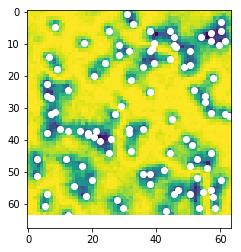

In [90]:
plt.imshow(h_sec.h[::-1,:])
plt.scatter(data_points[:,0]-0.5, data_points[:,1]-0.5, c='w')